In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
import time
from fbprophet import Prophet
from matplotlib.pylab import rcParams

In [2]:
pd.options.display.max_rows = 365

In [3]:
master = pd.read_csv('master_timeseries.csv')

In [4]:
master=master.rename(columns={'Unnamed: 0':'Date'})

In [5]:
master=master.set_index('Date')

In [6]:
msft_df=pd.DataFrame(master['MSFT'])

In [7]:
msft_df= msft_df.reset_index()

In [8]:
msft_df= msft_df.rename(columns={'Date': 'ds', 'MSFT': 'y'})

In [9]:
len(msft_df)

3649

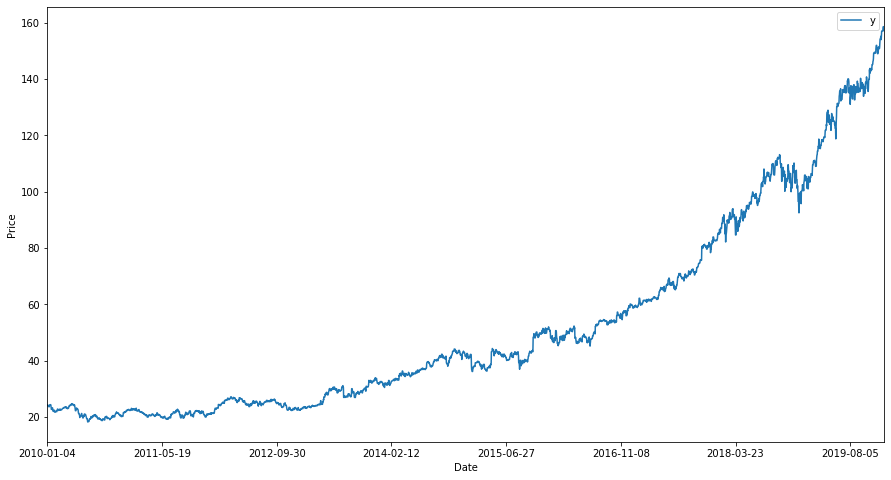

In [83]:
pd.plotting.register_matplotlib_converters()
ax = msft_df.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [10]:
train = msft_df[:int(0.9*(len(msft_df)))]
valid = msft_df[int(0.9*(len(msft_df))):]

In [11]:
prophet = Prophet(interval_width=0.95)
prophet.fit(train)
#prophet.fit(msft_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = prophet.make_future_dataframe(periods=(365), freq='D')
future.tail()

,ds
3644,2019-12-27
3645,2019-12-28
3646,2019-12-29
3647,2019-12-30
3648,2019-12-31


In [13]:
#use to forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3644,2019-12-27,139.653460,123.388363,154.502611
3645,2019-12-28,139.719883,123.351747,154.708462
3646,2019-12-29,139.797862,123.550528,155.540662
3647,2019-12-30,139.902695,124.296934,156.162659
3648,2019-12-31,140.058386,123.162239,155.341378


In [14]:
comparison_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][3284:]

In [15]:
act= msft_df[3284:]

In [16]:
comparison_df = comparison_df.merge(act, left_index=True, right_index=True )

In [17]:
comparison_df.head()

,ds_x,yhat,yhat_lower,yhat_upper,ds_y,y
3284,2019-01-01,111.650782,107.684372,115.560979,2019-01-01,99.817421
3285,2019-01-02,111.814053,107.850407,116.112561,2019-01-02,99.375191
3286,2019-01-03,111.973271,107.776231,116.239866,2019-01-03,95.719376
3287,2019-01-04,112.161970,108.135164,116.212335,2019-01-04,100.171211
3288,2019-01-05,112.305720,108.336368,116.315336,2019-01-05,100.171211


In [18]:
comparison_df.drop(columns='ds_y', inplace=True)
comparison_df.rename(columns = {'ds_x':'date'}, inplace=True)
comparison_df.set_index('date', inplace=True)

In [19]:
comparison_df

,yhat,yhat_lower,yhat_upper,y
date,,,,
2019-01-01,111.650782,107.684372,115.560979,99.817421
2019-01-02,111.814053,107.850407,116.112561,99.375191
2019-01-03,111.973271,107.776231,116.239866,95.719376
2019-01-04,112.161970,108.135164,116.212335,100.171211
2019-01-05,112.305720,108.336368,116.315336,100.171211
2019-01-06,112.453083,108.402296,116.757772,100.171211
2019-01-07,112.617572,108.347625,116.531897,100.298965
2019-01-08,112.821630,108.397299,116.973167,101.026199
2019-01-09,113.008691,108.888935,117.206248,102.470825


In [20]:
rms=np.sqrt(np.mean(np.power((np.array(comparison_df['y'])-np.array(comparison_df['yhat'])),2)))
rms

8.363286214903052

In [22]:
#use to predict and validate for known data
close_prices = prophet.make_future_dataframe(periods=len(valid))
forecast = prophet.predict(close_prices)

In [43]:
from sklearn.metrics import mean_squared_error
forecast_valid = forecast['yhat'][3284:]

rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

8.363286214903052

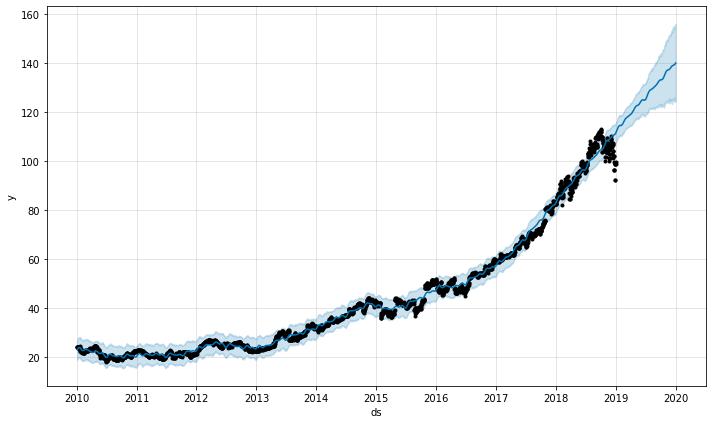

In [17]:
fig1 = prophet.plot(forecast)

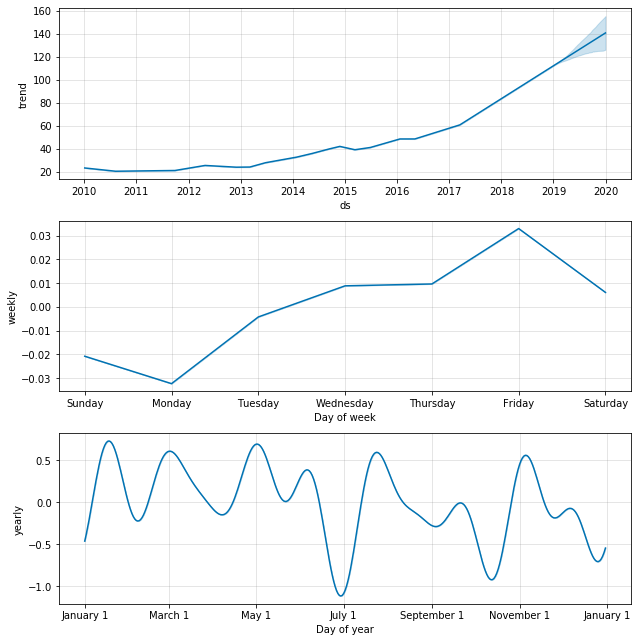

In [18]:
fig2 = prophet.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [ ]:
py.init_notebook_mode()

fig = plot_plotly(prophet, forecast)  # This returns a plotly Figure
py.iplot(fig)